In [1]:
# importing required Libraries 
import pandas as pd
import numpy as np
import warnings #Supress the warnings 
warnings.filterwarnings('ignore') 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_url = '/Users/virenparshetty/Desktop/ALY 6140/Capstone Project/adult.csv'
census_data = pd.read_csv(data_url)

In [3]:
from capstone_group8 import import_csv

census_data = import_csv('/Users/virenparshetty/Desktop/ALY 6140/Capstone Project/adult.csv')

In [4]:
#Viewing the imported data 
census_data.head(10) 

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [5]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#Shape of the data 
census_data.shape

(32561, 15)

In [7]:
#Checking the data structure 
census_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [8]:
# Checking the unique entries in each columns
census_data.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [9]:
# describing the numerical variables 
census_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [10]:
# Checking for null values 
census_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [11]:
#Data set had no null values but has corrupt data ?. We need to further explore the dataset.
census_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [12]:
#Checking for the ?s in each columns so they be either excluded or treated. 
census_data['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

In [13]:
# Checking the variable 'workclass' 
census_data['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [14]:
# Checking the varibale 'fnlwgt'
census_data['fnlwgt'].value_counts()

164190    13
203488    13
123011    13
113364    12
121124    12
          ..
183522     1
44419      1
442612     1
374833     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64

In [15]:
# Checking the variable 'education' 
census_data['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [16]:
# Checking the variable 'education.num'
census_data['education.num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education.num, dtype: int64

In [17]:
# Checking variable 'marital.status'
census_data['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [18]:
# Checking the variable 'occupation'

census_data['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [19]:
# Checking the variable 'relationship'
census_data['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [20]:
# Checking variable 'race'
census_data['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [21]:
# Checking variable 'sex'
census_data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [22]:
census_data['capital.gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
4931         1
7978         1
5060         1
2538         1
Name: capital.gain, Length: 119, dtype: int64

In [23]:
census_data['capital.loss'].value_counts()

0       31042
1902      202
1977      168
1887      159
1485       51
        ...  
2201        1
2163        1
1944        1
1539        1
2472        1
Name: capital.loss, Length: 92, dtype: int64

In [24]:
census_data['hours.per.week'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
94        1
82        1
92        1
87        1
74        1
Name: hours.per.week, Length: 94, dtype: int64

In [25]:
census_data['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [26]:
census_data['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

## Data Cleaning

#### After looking at each feature, we decided to replace the ?s with mode(most frequent observations in the respective feature )

In [27]:
census_data['workclass'] = census_data['workclass'].replace('?', 'Private')
census_data['occupation'] = census_data['occupation'].replace('?', 'Prof-specialty')
census_data['native.country'] = census_data['native.country'].replace('?', 'United-States')

In [28]:
census_data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [29]:
# Reducing the feature 'education' for better understanding
census_data['education'] = census_data['education'].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th'], 'School')
census_data['education'] = census_data['education'].replace(['HS-grad'], 'High school')
census_data['education'] = census_data['education'].replace(['Assoc-voc', 'Assoc-acdm', 'Some-college', 'Prof-school' ], 'Higher')
census_data['education'] = census_data['education'].replace('Bachelors', 'Undergrad')
census_data['education'] = census_data['education'].replace('Masters ', 'Graduation')
census_data['education'] = census_data['education'].replace('Doctorate ', 'Doc')

In [30]:
# Checking features
census_data['education'].value_counts()

High school    10501
Higher         10316
Undergrad       5355
School          4253
Masters         1723
Doctorate        413
Name: education, dtype: int64

In [31]:
# Some level of this feature made sense. We grouped them into meaningful groups.
census_data['marital.status'] = census_data['marital.status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'Married')
census_data['marital.status'] = census_data['marital.status'].replace(['Never-married'], 'Unmarried')
census_data['marital.status'] = census_data['marital.status'].replace(['Divorced','Separated', 'Married-spouse-absent','Widowed'], 'Other')

In [32]:
# Checking feature 'marital.status
census_data['marital.status'].value_counts()

Married      14999
Unmarried    10683
Other         6879
Name: marital.status, dtype: int64

In [33]:
census_data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,High school,9,Other,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,High school,9,Other,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Higher,10,Other,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,School,4,Other,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Higher,10,Other,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Higher,10,Unmarried,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Higher,12,Married,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,High school,9,Married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,High school,9,Other,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


## Exploratory Data Analysis

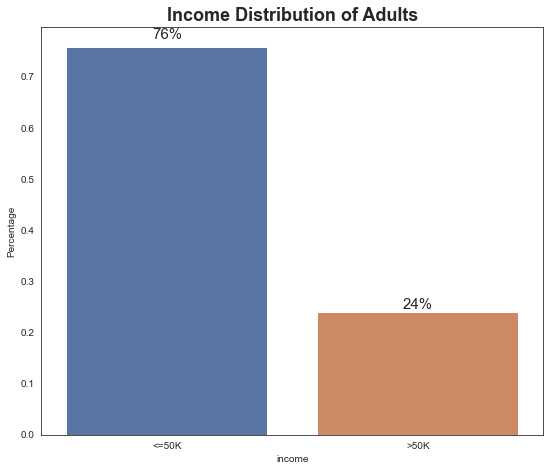

In [34]:
sns.set_style("white")
plt.figure(figsize = (9,7.5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = census_data['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')


ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='deep')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='100', fontsize=15)

[Text(0.5, 1.0, 'Age Distribution')]

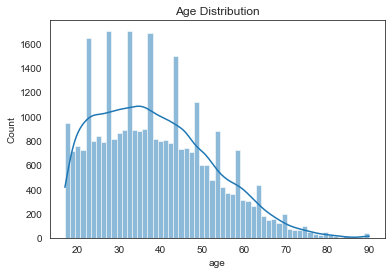

In [35]:
# Distribution of the age 
sns.histplot(data=census_data, x="age", kde=True).set(title='Age Distribution')

In [36]:
# Self defined function to greate age groups

def age_group(x):
    
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

census_data['age_group'] = census_data['age'].apply(age_group)

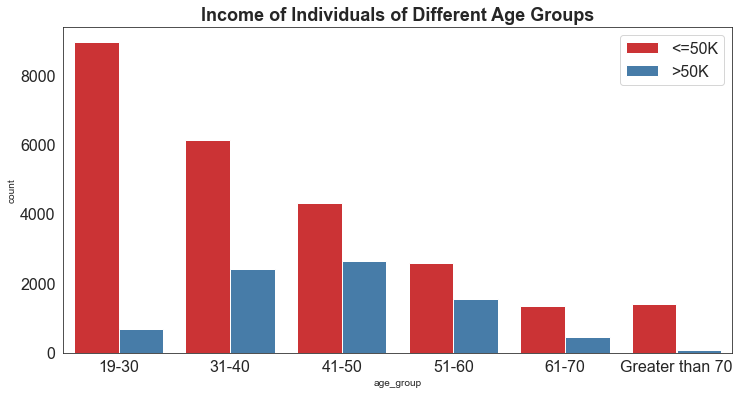

In [37]:
# Income as per age group
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(census_data['age_group'], hue = census_data['income'], palette='Set1', order = order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

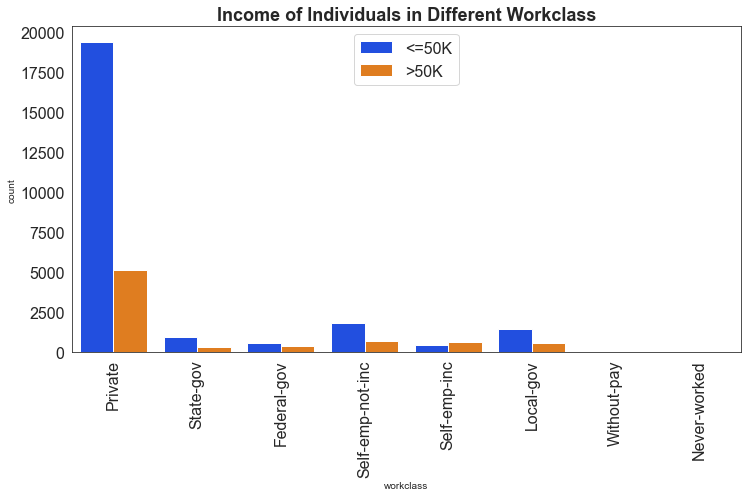

In [38]:
# Income as per workclass

plt.figure(figsize=(12,6))
sns.countplot(census_data['workclass'], hue = census_data['income'], palette='bright')
plt.title('Income of Individuals in Different Workclass', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

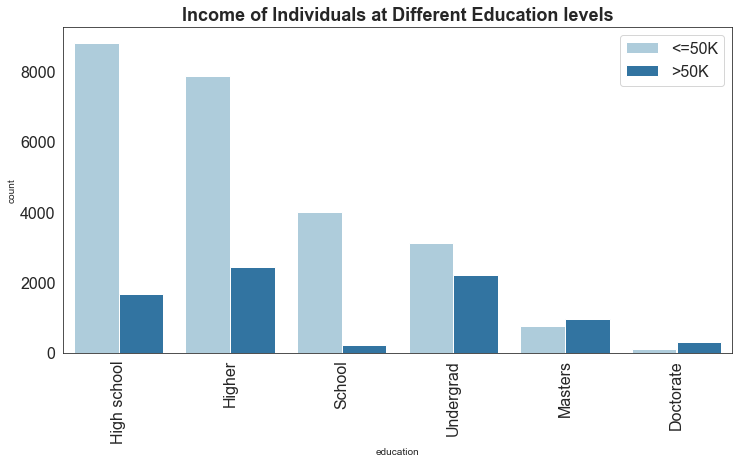

In [39]:
# Income as per education level 
order_list = ['High school', 'Higher', 'School', 'Undergrad', 'Masters', 'Doctorate']
plt.figure(figsize=(12,6))
sns.countplot(census_data['education'], hue = census_data['income'], palette='Paired', order= order_list)
plt.title('Income of Individuals at Different Education levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

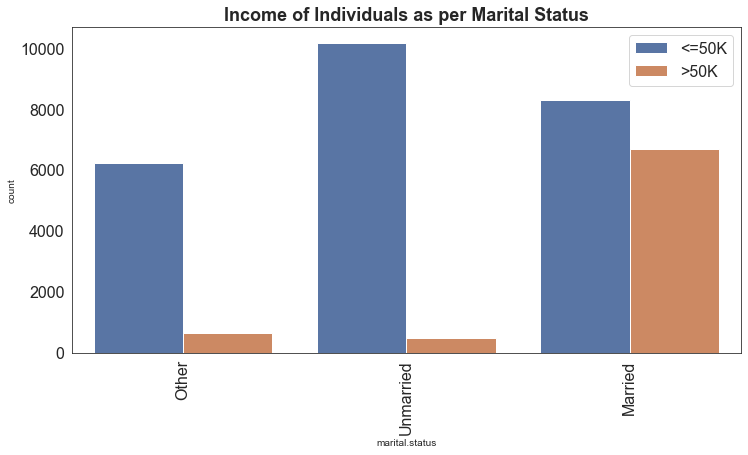

In [40]:
# Income distribution as per 

plt.figure(figsize=(12,6))
sns.countplot(census_data['marital.status'], hue = census_data['income'], palette='deep')
plt.title('Income of Individuals as per Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [1]:
# Income as per education

plt.figure(figsize=(12,6))
sns.countplot(census_data['occupation'], hue = census_data['income'], palette='deep', orientation='h')
plt.title('Income of Individuals as per Occupation', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

NameError: name 'plt' is not defined

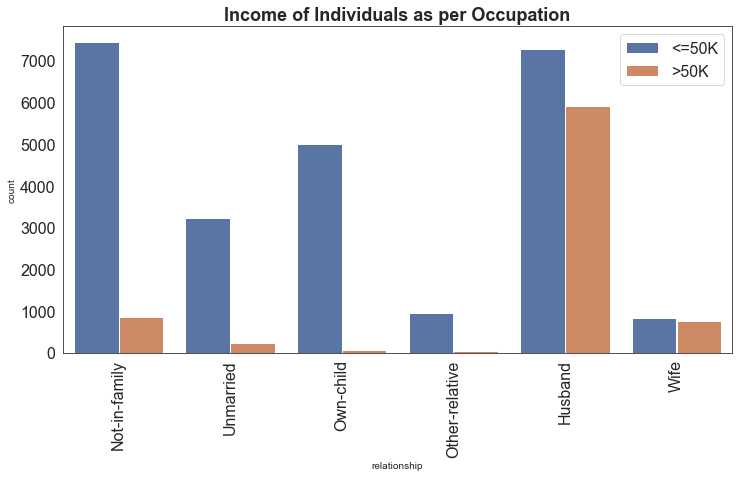

In [42]:
# Income as per relationship

plt.figure(figsize=(12,6))
sns.countplot(census_data['relationship'], hue = census_data['income'], palette='deep')
plt.title('Income of Individuals as per Occupation', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

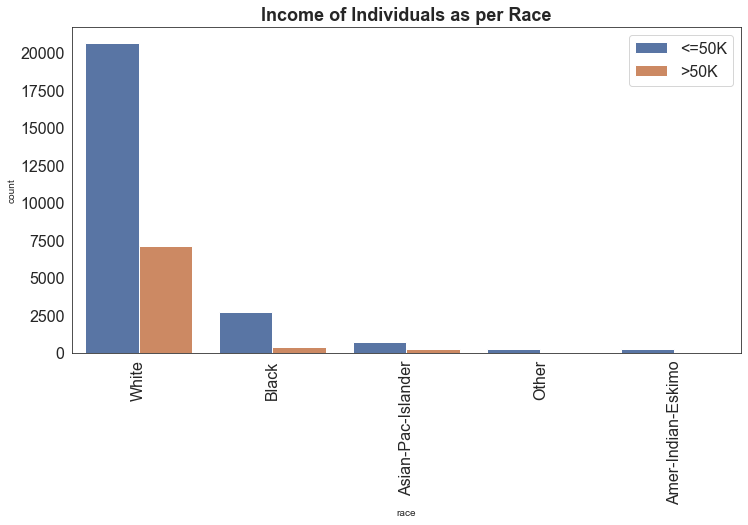

In [43]:
# Income as per race

plt.figure(figsize=(12,6))
sns.countplot(census_data['race'], hue = census_data['income'], palette='deep')
plt.title('Income of Individuals as per Race', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

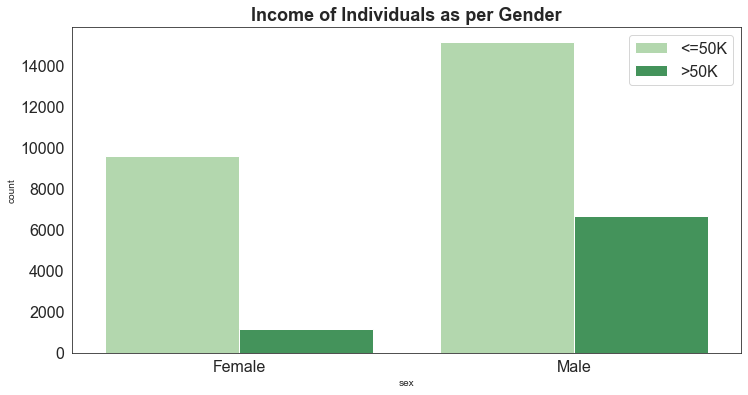

In [44]:
# Income as per gender

plt.figure(figsize=(12,6))
sns.countplot(census_data['sex'], hue = census_data['income'], palette='Greens')
plt.title('Income of Individuals as per Gender', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [45]:
# Mapping the target variable (machine readble format)
census_data['income']=census_data['income'].map({'<=50K': 0, '>50K': 1})

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'fnlwgt'),
  Text(0, 2.5, 'education.num'),
  Text(0, 3.5, 'capital.gain'),
  Text(0, 4.5, 'capital.loss'),
  Text(0, 5.5, 'hours.per.week'),
  Text(0, 6.5, 'income')])

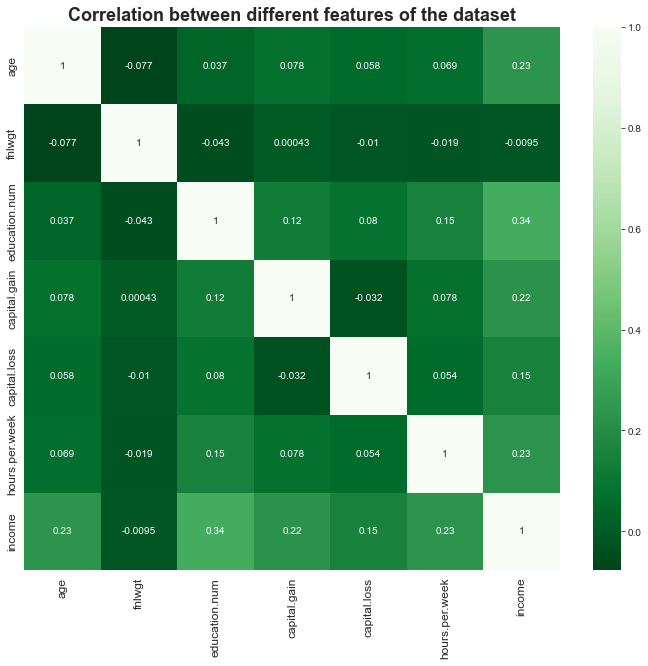

In [46]:
plt.figure(figsize = (12,10))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(census_data.corr(), cmap = 'Greens_r', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 90)

### Model Building

In [47]:
#Dropping the variable that we created for EDA 

census_data.drop('age_group', inplace = True, axis = 1)

In [48]:
# Dropping the feature education num as it is same as education in the data 

census_data.drop('education.num', inplace = True, axis = 1)

In [49]:
# import some classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# import needed functions
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

### Data Pre-processing

In [50]:
# Making a copy to be on a safe side

census_data1 = census_data.copy()

In [51]:
# Scalling
from sklearn.preprocessing import StandardScaler
numerical = ['age', 'capital.gain', 'capital.loss', 'hours.per.week', 'fnlwgt']

scaler = StandardScaler()
census_data1[numerical] = scaler.fit_transform(census_data1[numerical])

In [52]:
census_data1

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,3.769612,Private,-1.067997,High school,Other,Prof-specialty,Not-in-family,White,Female,-0.14592,10.593507,-0.035429,United-States,0
1,3.183112,Private,-0.539169,High school,Other,Exec-managerial,Not-in-family,White,Female,-0.14592,10.593507,-1.817204,United-States,0
2,2.010110,Private,-0.035220,Higher,Other,Prof-specialty,Unmarried,Black,Female,-0.14592,10.593507,-0.035429,United-States,0
3,1.130359,Private,-0.468215,School,Other,Machine-op-inspct,Unmarried,White,Female,-0.14592,9.461864,-0.035429,United-States,0
4,0.177296,Private,0.709482,Higher,Other,Prof-specialty,Own-child,White,Female,-0.14592,9.461864,-0.035429,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.215643,Private,1.140460,Higher,Unmarried,Protective-serv,Not-in-family,White,Male,-0.14592,-0.216660,-0.035429,United-States,0
32557,-0.849080,Private,0.639741,Higher,Married,Tech-support,Wife,White,Female,-0.14592,-0.216660,-0.197409,United-States,0
32558,0.103983,Private,-0.335433,High school,Married,Machine-op-inspct,Husband,White,Male,-0.14592,-0.216660,-0.035429,United-States,1
32559,1.423610,Private,-0.358777,High school,Other,Adm-clerical,Unmarried,White,Female,-0.14592,-0.216660,-0.035429,United-States,0


In [53]:
!pip install utility

zsh:1: command not found: pip


In [54]:
# Using a self defined function as requirement of the capstone project
# we code use this funtion to endoce all the ob categorical variables but we shall use the get dummies functions later in the ci
variable_le = ['sex']

from capstone_group8 import func_labelencoder

variable_le = ['sex']
for i in variable_le:
    func_labelencoder(i,census_data1)

In [55]:
census_data1

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,3.769612,Private,-1.067997,High school,Other,Prof-specialty,Not-in-family,White,0,-0.14592,10.593507,-0.035429,United-States,0
1,3.183112,Private,-0.539169,High school,Other,Exec-managerial,Not-in-family,White,0,-0.14592,10.593507,-1.817204,United-States,0
2,2.010110,Private,-0.035220,Higher,Other,Prof-specialty,Unmarried,Black,0,-0.14592,10.593507,-0.035429,United-States,0
3,1.130359,Private,-0.468215,School,Other,Machine-op-inspct,Unmarried,White,0,-0.14592,9.461864,-0.035429,United-States,0
4,0.177296,Private,0.709482,Higher,Other,Prof-specialty,Own-child,White,0,-0.14592,9.461864,-0.035429,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.215643,Private,1.140460,Higher,Unmarried,Protective-serv,Not-in-family,White,1,-0.14592,-0.216660,-0.035429,United-States,0
32557,-0.849080,Private,0.639741,Higher,Married,Tech-support,Wife,White,0,-0.14592,-0.216660,-0.197409,United-States,0
32558,0.103983,Private,-0.335433,High school,Married,Machine-op-inspct,Husband,White,1,-0.14592,-0.216660,-0.035429,United-States,1
32559,1.423610,Private,-0.358777,High school,Other,Adm-clerical,Unmarried,White,0,-0.14592,-0.216660,-0.035429,United-States,0


In [56]:
# Create dummy variables
census_data1 = pd.get_dummies(census_data1)

In [57]:
# Partioning the data
X = census_data1.drop('income', axis=1)
y = census_data1['income']

# Splitting to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
models = {}

# models with default parameter
models['LogisticRegression'] = LogisticRegression()
models['RandomForest'] = RandomForestClassifier()
models['AdaBoost'] = AdaBoostClassifier()


In [59]:
# Cross validation
for model_name in models:
    model = models[model_name]
    results = cross_validate(model, X, y, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
    
    print(model_name + ":")
    print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
    print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())
    print("---------------------------------------------------------")

LogisticRegression:
Accuracy: train:  0.8515094594571014 | test:  0.829735534600804
F1-score: train:  0.6603761505474166 | test:  0.5970206629851443
---------------------------------------------------------
RandomForest:
Accuracy: train:  0.9998848315469155 | test:  0.8051050375152172
F1-score: train:  0.9997608125955045 | test:  0.5450037783238519
---------------------------------------------------------
AdaBoost:
Accuracy: train:  0.8637786662666456 | test:  0.803723265998715
F1-score: train:  0.6885976471013981 | test:  0.5266567356567332
---------------------------------------------------------


### The above results shows imbalance in the classification categories, this might be because we had approximately 75of the data with individuals earning less than 50k per year

In [60]:
# Using the Random Over Sampler to fix the imbalanced target variable

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [61]:
clf = RandomForestClassifier()

results = cross_validate(clf, X_resampled, y_resampled, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())

Accuracy: train:  0.9999595469255663 | test:  0.9122370550161814
F1-score: train:  0.999959548715351 | test:  0.9197163433693232


### Feature Importance 

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
# Create a new copy to find important features
census_data2 = census_data.copy()

In [64]:
# Using a label encoder for categorical variables 

for col in census_data2.columns:
    if census_data2[col].dtypes == 'object':
        encoder = LabelEncoder()
        census_data2[col] = encoder.fit_transform(census_data2[col])

In [65]:
# Dividing the data

Xc = census_data2.drop('income', axis=1)
yc = census_data2['income']

# Splitting to training and testing
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.3, random_state=42)

In [66]:
clf = RandomForestClassifier()

clf.fit(Xc_train, yc_train)

# View a list of the features and their importance scores
print('\nFeatures Importance:')
feat_imp = pd.DataFrame(zip(Xc.columns.tolist(), clf.feature_importances_ * 100), columns=['feature', 'importance'])
feat_imp


Features Importance:


,feature,importance
0,age,15.691962
1,workclass,4.073193
2,fnlwgt,18.094458
3,education,7.539592
4,marital.status,9.326169
5,occupation,7.425292
6,relationship,8.661134
7,race,1.481190
8,sex,1.147250
9,capital.gain,12.284794


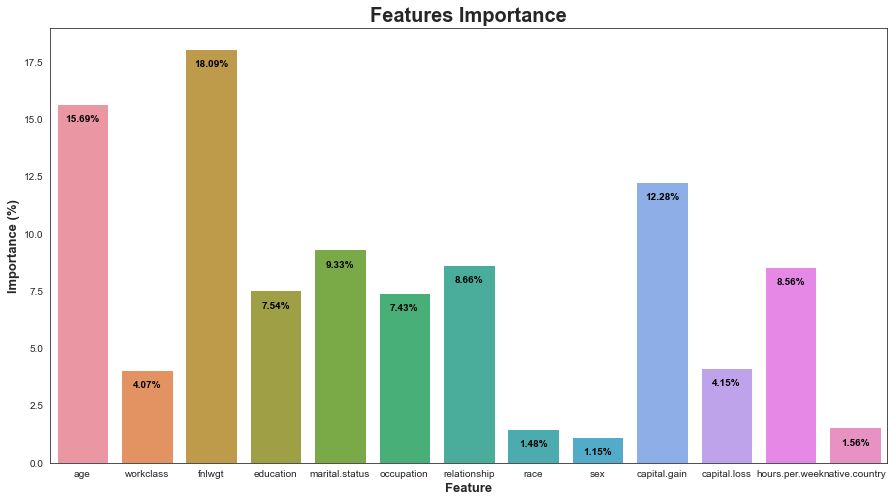

In [67]:
# Features importance plot

plt.figure(figsize=[15,8])
sns.barplot(data=feat_imp, x='feature', y='importance')
plt.title('Features Importance', weight='bold', fontsize=20)
plt.xlabel('Feature', weight='bold', fontsize=13)
plt.ylabel('Importance (%)', weight='bold', fontsize=13);


# add annotations
impo = feat_imp['importance']
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = impo[loc]
    pct_string = '{:0.2f}%'.format(count)

    plt.text(loc, count-0.8, pct_string, ha = 'center', color = 'black', weight='bold')

In [68]:
# We plan to drop the variable with less than 5% importance

In [69]:
# Making a copy to be on a safe side
census_data3 = census_data.copy()

In [70]:
# Checking head 
census_data3.head()

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,High school,Other,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,High school,Other,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Higher,Other,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,School,Other,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Higher,Other,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [71]:
census_data3.drop(['race', 'sex', 'capital.loss', 'native.country','workclass'], axis=1, inplace=True)

In [72]:


# Scalling
numerical = ['age', 'capital.gain', 'hours.per.week', 'fnlwgt']
scaler = StandardScaler()
census_data3[numerical] = scaler.fit_transform(census_data3[numerical])

# Create dummy variables
census_data3 = pd.get_dummies(census_data3)

# Partioning
Xf = census_data3.drop('income', axis=1)
yf = census_data3['income']

# Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(Xf, yf)

In [73]:
clf = RandomForestClassifier()

results = cross_validate(clf, X_resampled, y_resampled, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())

Accuracy: train:  0.9999140372168285 | test:  0.9134708737864077
F1-score: train:  0.999914043992181 | test:  0.9197016203854466
